In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import http.client
from urllib.parse import urlencode
import time
from hashlib import sha1
import random
import string
import json
import numpy as np
import seaborn as sb
import numpy as np
import pandas as pd
sb.set(rc={"figure.figsize":(14,8)})

In [4]:
district =      'gr%C3%B6ndal'
district =      's%C3%B6dermalm'
startDate =     '20160101'
endDate =       '20160901'
callerId =      'YOUR_CALLER_ID'
privateKey =    'YOUR_PRIVATE_KEY'
minLivingArea = 40
maxLivingArea = 70

In [7]:
dateArray = [d.strftime('%Y-%m-%d') for d in pd.date_range(startDate,endDate,freq='MS')]

timestamp = str(int(time.time()))
unique = ''.join(random.choice(string.ascii_uppercase + string.digits) for x in range(16))
hashstr = sha1((callerId+timestamp+privateKey+unique).encode('utf-8')).hexdigest()

kvmPriceMonth=[]
kvmSizeMonth=[]
kvmData = {'kvmPrice' : [],
           'kvmSize' : []}

for i in range(len(dateArray)-1):
    print(dateArray[i])
    url = ("/sold?q="+district+"&"
            "minSoldDate="+dateArray[i]+"&"
            "maxSoldDate="+dateArray[i+1]+"&"
            "minLivingArea="+str(minLivingArea)+"&"
            "maxLivingArea="+str(maxLivingArea)+"&"
            "limit=10000&"
            "callerId="+callerId+"&time="+timestamp+"&unique="+unique+"&hash="+hashstr)
    connection = http.client.HTTPConnection("api.booli.se")
    connection.request("GET", url)
    response = connection.getresponse()
    data = response.read().decode('utf8')
    connection.close()
    time.sleep(1)
    if response.status != 200:
        print("fail")
        kvmData['kvmPrice'].append(0)
        kvmData['kvmSize'].append(0)
    else:
        result = json.loads(data)
        count = result['totalCount']
        print("Objects: ",str(count))
        
        kvmPrice=[]
        kvmSize=[]
        for i in range(count):
            try:
                kvmPrice.append(result['sold'][i]['soldPrice']/result['sold'][i]['livingArea'])
                kvmSize.append(result['sold'][i]['livingArea'])
            except:
                print("info missing")
        nrObjects = count
        kvmData['kvmSize'].append(np.mean(kvmSize))
        kvmData['kvmPrice'].append(np.mean(kvmPrice))
    
df = pd.DataFrame(kvmData,index=pd.to_datetime(dateArray[0:-1]))

2016-01-01
Objects:  68
2016-02-01
Objects:  90
2016-03-01
Objects:  114
2016-04-01
Objects:  124
2016-05-01
Objects:  129
2016-06-01
Objects:  91
2016-07-01
Objects:  41
2016-08-01
Objects:  78


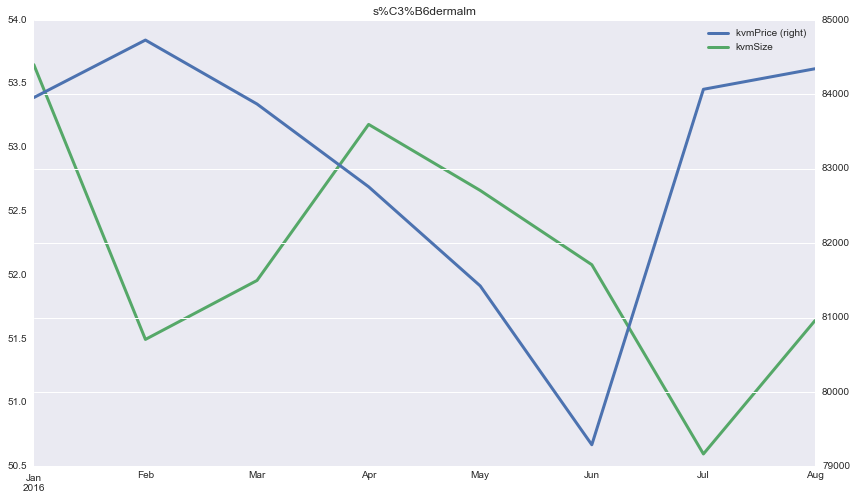

In [6]:
df.plot(secondary_y=['kvmPrice'],linewidth=3,title=district)
plt.show()